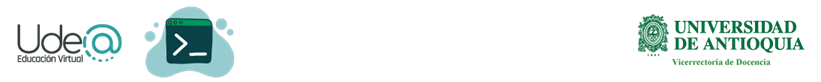

# Laboratorio Segmentación de Imágenes

**Autor:**
*   Pablo Alejandro Alvarado Duran, PhD.
*   Cristian David Ríos Urrego, MSc.
*   Diana Patricia Tobon Vallejo, PhD.

**Laboratorio Tratamiento de Señales III**

**Facultad de Ingeniería**

**Universidad de Antioquia**

---

## Introducción
La visión por computador (VC) es una rama de la inteligencia artificial, cuyo propósito es extraer información a partir de imágenes, videos y nubes de puntos. La VC abarca técnicas para

- Reconocer imágenes
- Detectar objetos
- Estimar movimientos
- Entre otros

Algunos ejemplos de aplicaciones de la vida real:

1. **Imágenes médicas:** La segmentación de imágenes tiene muchas aplicaciones en radiografía, resonancia magnética (RM), ultrasonidos y tomografía computerizada (TC), y ayuda en tareas como la detección de tumores, la segmentación cerebral, el diagnóstico de enfermedades y la planificación quirúrgica.


2. **Vehículos autónomos:** La segmentación de imágenes permite a los coches autónomos evitar obstáculos como peatones y otros coches, así como identificar carriles y señales de tráfico. Se utiliza de forma similar para la navegación en robótica.


3. **Imágenes por satélite:** La segmentación semántica y de instancias automatiza la identificación de diferentes características del terreno y topográficas.


4. **Ciudades inteligentes:** La segmentación de imágenes potencia tareas como el control y la vigilancia del tráfico en tiempo real.


5. **Fabricación:** Además de las tareas de robótica, la segmentación de imágenes permite clasificar productos y detectar defectos.


6. **Agricultura:** La segmentación de imágenes ayuda a los agricultores a estimar el rendimiento de los cultivos y a detectar las malas hierbas para su eliminación.


## Segmentación de imágenes

La segmentación de imágenes (SI) consiste en dividir una imagen en partes o regiones, comúnmente partiendo de las características de los pixeles en la imagen. El procesamiento y análisis de imágenes usualmente requiere el uso de segmentación.

La SI es esencial para el reconocimiento de imágenes y detección de objetos. En estos casos, la SI consiste en separar el primer plano y el fondo de una imágen, o agrupar regiones de pixeles basados en similitudes de color y forma. Por ejemplo, esta técnica es útil en imágenes médicas para detectar y etiquetar pixeles asociados a un tumor en un órgano de un paciente.  

### Aplicaciones de SI
Diferentes técnicas de segmentación han sido desarrolladas usando conocimiento específico según el área donde se requiera segmentar imágenes. Aplicaciones incluyen imágenes médicas, vehículos autónomos, vigilancia por video.


#### Conducción autónoma
El diseño de automóviles autoconducidos requiere el procesamiento y análisis de imágenes con el objetivo de diferenciar los objetos presentes en una escena (vía y alrededores), esto se conoce como segmentación **semántica**.

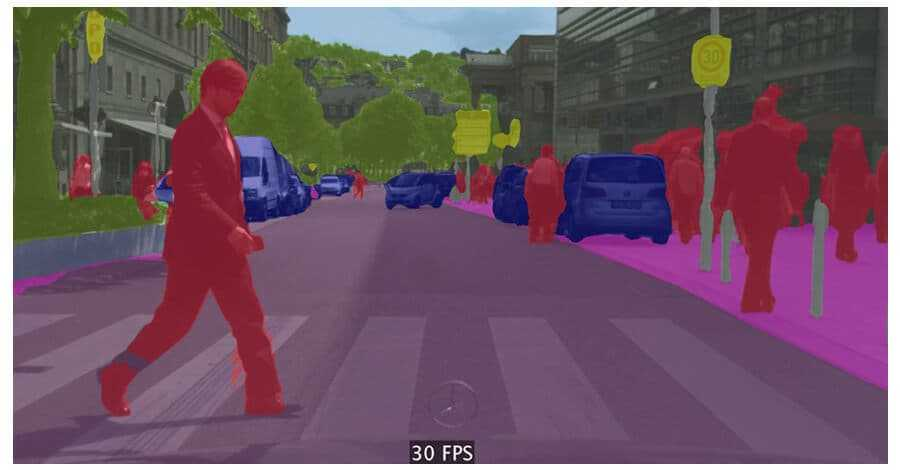

In [6]:
from IPython.display import Video

Video("Carro_autonomo.mp4", width=800, height=500)
# Fuente: https://www.youtube.com/watch?v=fKXztwtXaGo

## Principio de funcionamiento
La segmentación de imágenes consiste en etiquetar cada pixel $x_{i,j}$ presente en una imagen $X \in \mathbb{R}^{N \times M}$, generando una cantidad $K$ de grupos llamados regiones. Cada región está representada por un número entero diferente $k = 1, 2, 3 \cdots, K$. Por lo tanto, cada pixel $x_{i,j}$ tendrá una correspondiente etiqueta $y_{i,j} = k$.

Dividir una imágen en regiones permite procesar o analizar sólo los segmentos importantes para una tarea específica, evitando procesar datos (pixeles) de menor relevancia.



In [7]:
import skimage as ski
import numpy as np
from skimage import data, color, graph
from skimage import segmentation as seg
from matplotlib import pyplot as plt

In [8]:
def show(img):
    fig, ax = plt.subplots(1, 1, figsize=(7, 7))
    ax.imshow(img, cmap=plt.cm.gray)
    ax.set_axis_off()
    plt.show()

def showPair(img,filt_img):
    fig, ax = plt.subplots(1, 2, figsize=(15, 15))
    ax[0].imshow(img, cmap=plt.cm.gray)
    ax[0].set_axis_off()
    ax[1].imshow(filt_img, cmap=plt.cm.gray)
    ax[1].set_axis_off()
    plt.show()

# Tipos de algoritmos para SI
Existen diversos tipos de algoritmos para SI según el tipo de características de la imagen que se utilicen para la segmentación.

## Segmentación basada en discontinuidad
Una técnica común es buscar discontinuidades o cambios abruptos en los valores que toman los pixeles. Las discontinuidades indican por lo general los bordes que definen una región u objeto.

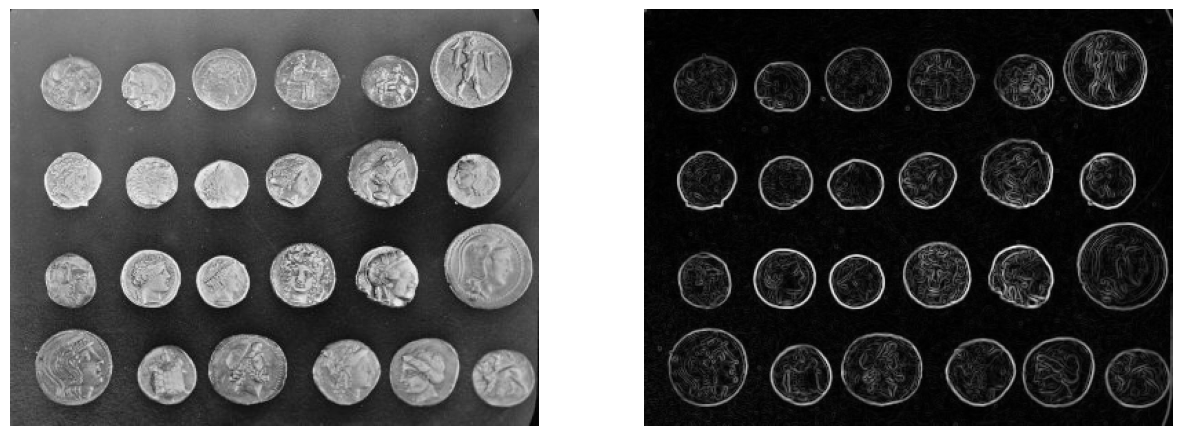

In [9]:
img = data.coins()
sobimg = ski.filters.sobel(img)
showPair(img,sobimg)

## Segmentación basada en medidas de similitud
Otro enfoque común para detectar regiones en una imagen consiste en agrupar pixeles usando como criterio una medida de similitud entre ellos. Estas medidas de similitud por lo general están basadas en valores de color, forma, y textura. A continuación se abordan diferentes técnicas basadas en similitud.

### Umbralización
Los pixeles son agrupados según su intensidad relativa a un punto de referencia (umbral).

In [11]:
!curl -O brain1.jpg "https://static.sciencelearn.org.nz/images/images/000/001/104/embed/75yo_male.jpg?1674165508"
!curl -O brain2.jpg "https://www.melbourneradiology.com.au/wp-content/uploads/2021/06/MRI-BRAIN-WITH-CONTRAST-0002.jpg"

curl: Remote file name has no length
curl: (23) Failed writing received data to disk/application
curl: Remote file name has no length
curl: (23) Failed writing received data to disk/application


In [12]:
from skimage.filters import threshold_otsu

**filters.threshold_otsu:** El método de Otsu calcula un umbral "óptimo" (marcado por una línea roja en el histograma siguiente) maximizando la variación entre dos clases de píxeles, que están separados por el umbral. De manera equivalente, este umbral minimiza la variación intraclase.

In [13]:
image = ski.io.imread('brain1.jpg')

thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(20, 7))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

FileNotFoundError: No such file: 'C:\Users\sebas\Documents\SEÑALES 3\Senales-III\Laboratorio\Laboratorio 3\brain1.jpg'

#### Ejemplo doble umbral

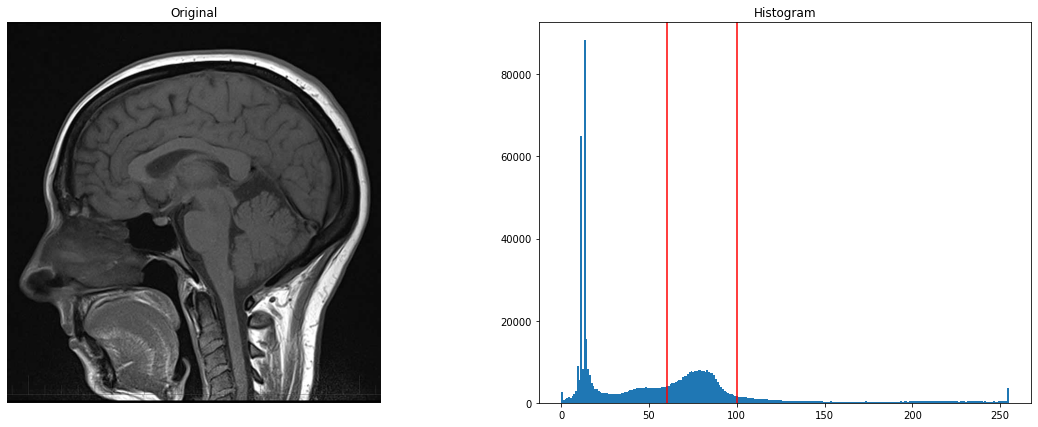

In [24]:
image = ski.io.imread('brain2.jpg')[:,:,0]

fig, axes = plt.subplots(ncols=2, figsize=(30, 7))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(x=60, color='r')
ax[1].axvline(x=100, color='r')



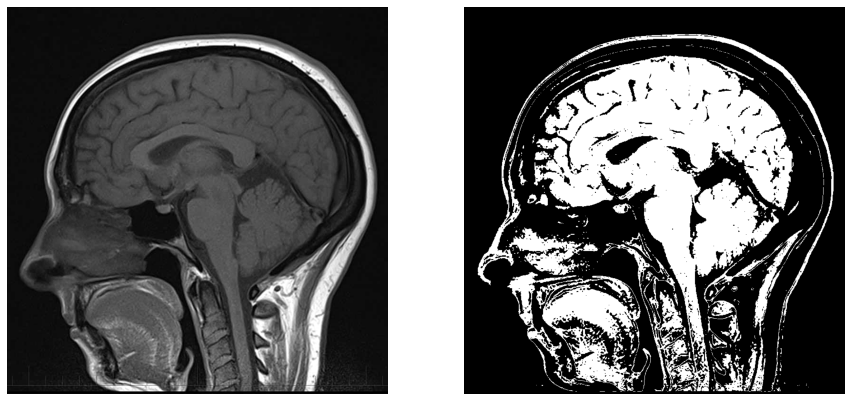

In [25]:
binary = np.logical_and(image > 60, image < 100)
showPair(image, binary)


### Agrupamiento
Esta técnica permite agrupar pixeles usando aprendizaje máquina no supervisado. En este caso aplicaremos el algoritmo de K-medias.


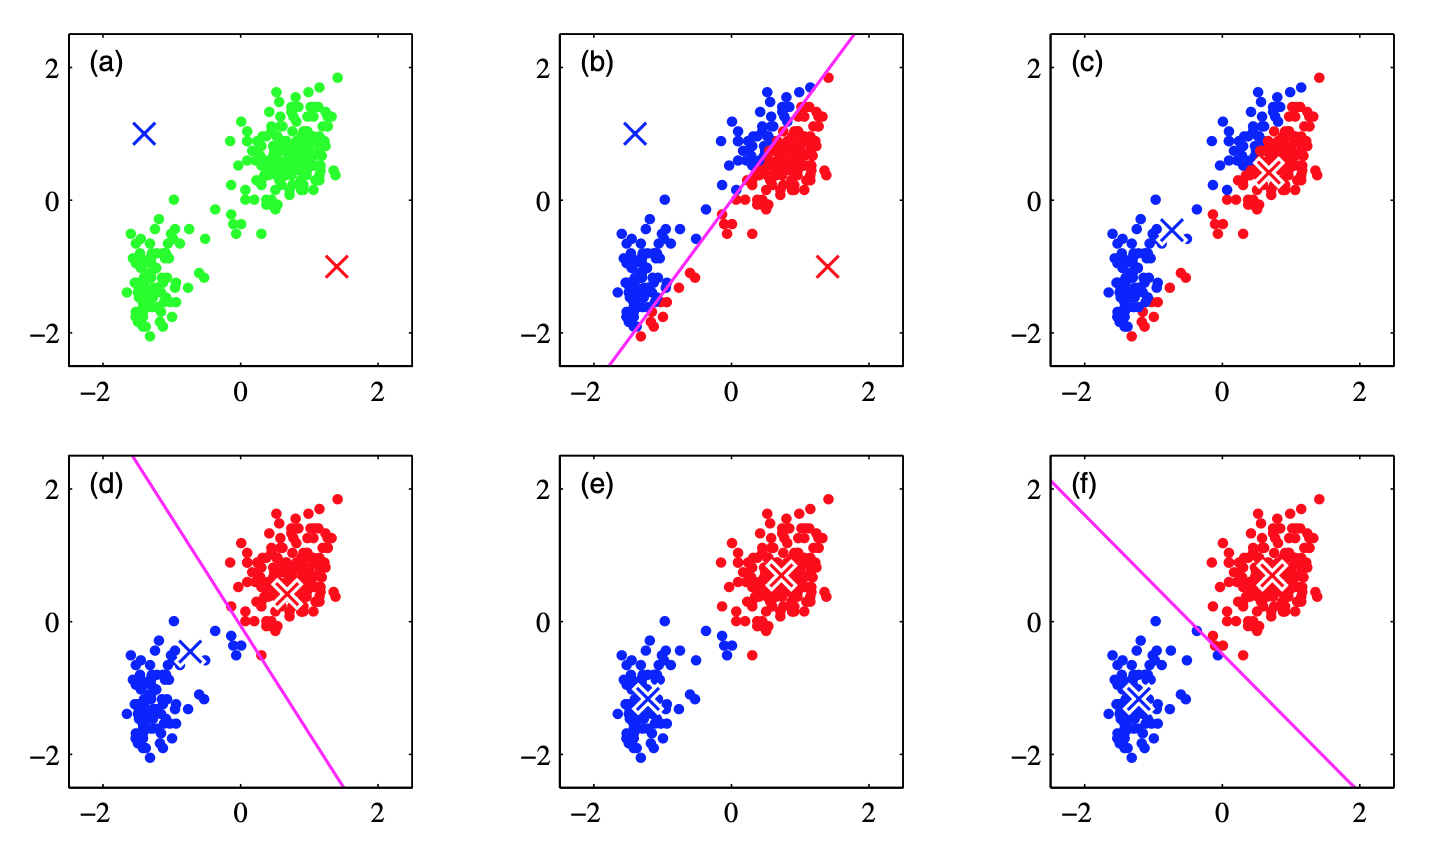

In [10]:
Video("K_means.mp4", width=800, height=500)
# Fuente: https://www.youtube.com/watch?v=nXY6PxAaOk0

In [11]:
from skimage import segmentation as seg

**segmentation.slic** de la libreria skimage nos permite realizar esta segmentación usando el método de agrupamiento bajo la técnica de k-means. Entre sus argumentos se encuentra: la imagen a segmentar (a color o en escala de grises), el número de segmentos (etiquetas) o clusters a agrupar en la imagen (n_segments) y compactness que corresponde al equilibrio entre la proximidad de color la proximidad especial, es un parámetro a optimizar experimentalmente y se recomienda evaluarlo a partir de valores en una escala logarítmica, por ejemplo, 0.01, 0.1, 1, 10, 100

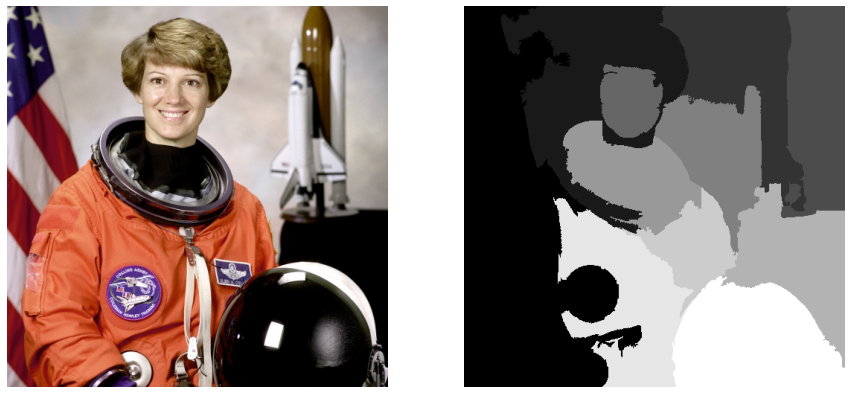

In [39]:
img = data.astronaut()
segments = seg.slic(img, n_segments=35, compactness=1)
showPair(img, segments)


### Watersheds (Regiones)

En este caso, la imágen se divide en regiones de características similares. Cada región es un grupo de pixeles, que se forma tomando como referencia un punto o pixel raíz. Las regiones pueden fundirse, incrementar, o decrecer a medida que se adicionan o remueven pixeles.

El algoritmo Watersheds trabaja en imágenes en escala de grises e interpreta la intensidad de cada pixel como una altura (mapa topográfico), detectando crestas y valles/cuencas. De esta manera la imagen se divide en múltiples regiones basados en la altura del pixel, agrupado pixeles con la misma intensidad de gris.

![Image 1](https://homeli.co.uk/wp-content/uploads/2014/09/Handcut-Contours-Topography-Map-of-Milford-Sound-by-Sam-Caldwell.jpg)

Fuente: https://homeli.co.uk/samaps-topographical-3d-maps-in-coloured-paper-by-sam-caldwell/

En otras palabras, es una técnica a partir de la cual podemos pensar que si “inundamos” la imagen, empezando por sus valles (es decir, por sus puntos topográficamente más bajos), y si prevenimos que aguas de diferentes fuentes o colores se combinen, obtendremos diferentes particiones, correspondientes a las regiones (watersheds).

In [13]:
Video("Watersheds.mp4", width=800, height=500)
# FUENTE: https://www.datasmarts.net/como-segmentar-imagenes-con-watershed-en-opencv/

Esta técnica necesita de dos parámetros para funcionar: los bordes que se pueden interpretar como los puntos más altos en el territorio (estos los podemos detectar a partir de filtros de Sobel). Además, se necesitan unos marcadores dado que esta técnica es muy sensible al ruido e imperfecciones, estos marcadores los podemos interpretar como zonas previamente inundadas y a partir de las cuales se continuara inundando las regiones para encontrar los segmentos de interés, es importante mencionar que en estos marcadores se deben identificar visualmente el número de segmentos deseados.

In [14]:
Video("Watersheds2.mp4", width=900, height=500)
# FUENTE: https://www.datasmarts.net/como-segmentar-imagenes-con-watershed-en-opencv/

### Veamos un ejemplo a partir de la imagen de las monedas

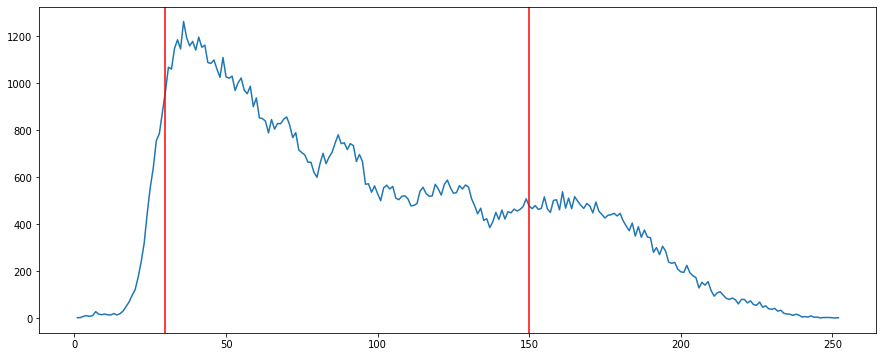

In [40]:
coins = data.coins()
markers = np.zeros_like(coins)
hist, bins = ski.exposure.histogram(coins)

plt.figure(figsize=(15,6))
plt.plot(bins, hist) # histograma
plt.axvline(x=30, color='r' )
plt.axvline(x=150, color='r' )

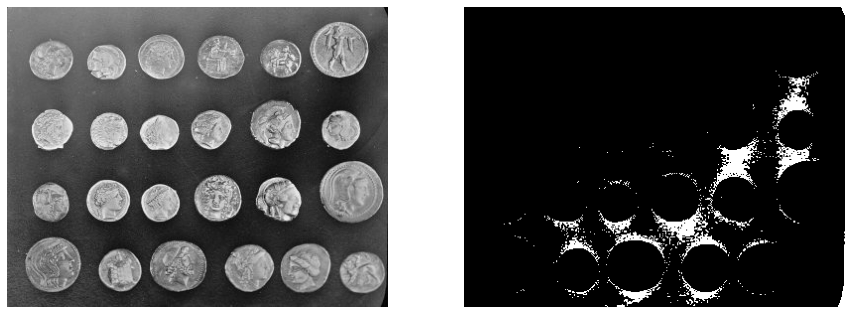

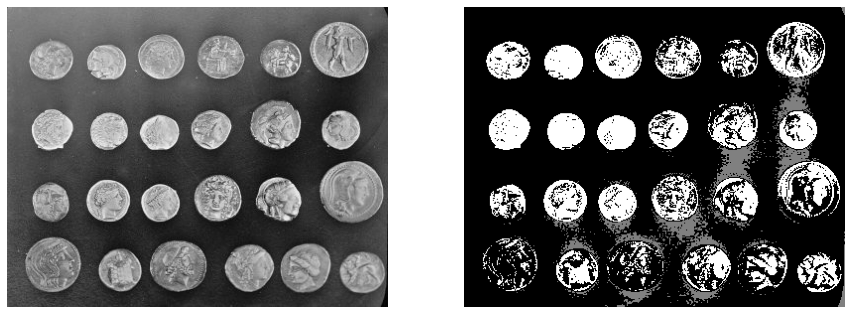

In [16]:
markers[coins < 30] = 1
showPair(coins, markers)

markers[coins > 150] = 2
showPair(coins, markers)

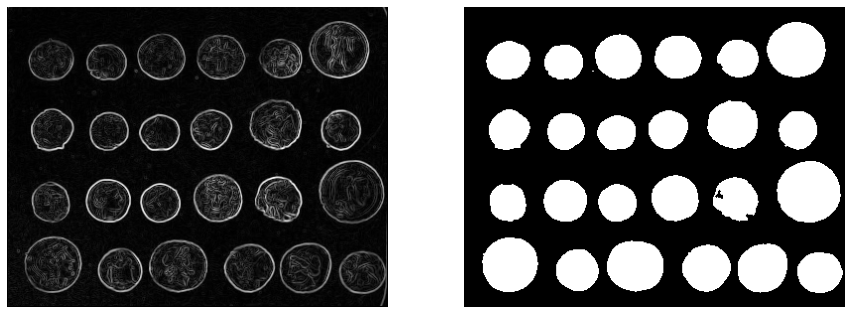

In [17]:
elevation_map = ski.filters.sobel(data.coins())
segmentation_coins = seg.watershed(elevation_map, markers)
showPair(elevation_map, segmentation_coins)

# Aprendizaje profundo para segmentación de imágenes
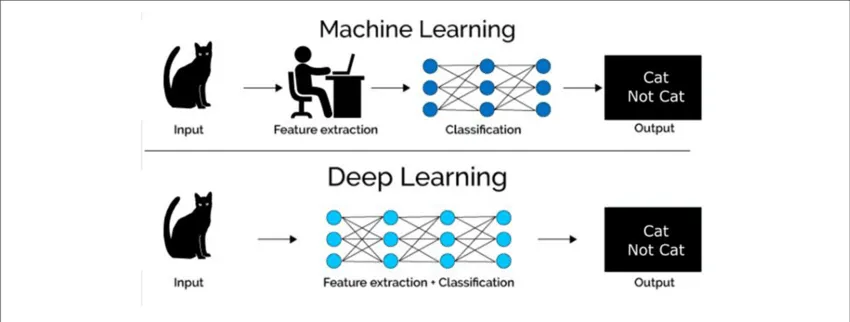


### Ejemplo red neuronal
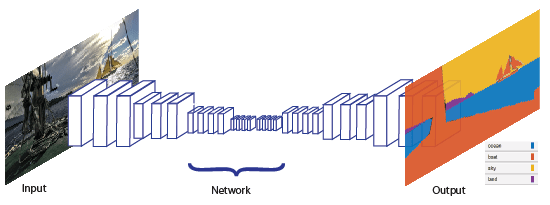


# Trabajo de laboratorio
 En el laboratorio anterior estudiamos diferentes tipos de filtros, y entendimos cómo diferentes tipos de ruido afectan a los datos. En ciertas aplicaciones de tratamiento y análisis de imágenes es necesario tener una etapa previa a la segmentación, de manera que artefactos (datos espurios u outliers) y ruido sean eliminados de los datos.

1. Para hacer evidente la necesidad de limpiar las imágenes antes de segmentarlas, vamos a añadir ruido sal y pimienta (caso A), y ruido Gaussiano (caso B) a una imagen obtenida al escanear una hoja con texto, esta imagen corresponde a ```skimage.data.page()```.


2. Posteriormente, aplique un filtro para reducir la cantidad de ruido (a partir de la experiencia del laboratorio anterior, determine que filtro es el adecuado para cada tipo de ruido). A continuación, aplique dos técnicas de segmentación tanto a la imagen ruidosa como a la imagen filtrada. ¿Qué diferencias presentan estos resultados? ¿Cuál es la causa de estas diferencias? ¿Qué tanto afectan los parámetros del ruido añadido, los parámetros del filtro, y los parámetros de segmentación a los resultados? Por favor argumente su respuesta.


3. Investigue el principio de funcionamiento de las técnicas (implementadas en ```skimage```) de segmentación *Random Walker* y *Chan-vese* y apliquelas a la imagen ```skimage.data.coins()```, de manera que se diferencien las monedas (foreground) del fondo (background). Compare los resultados con la segmentación basada umbral (thresholding). Para este caso específico, ¿qué técnica presenta mejores resultados y por qué?


4. Finalmente, escoja alguna técnica de segmentación y separe la nariz del gato presente en la imagen ```skimage.data.chelsea()``` en escala de grises (convierta la imagen antes de hacer el proceso de segmentación). Describa los argumentos que lo llevaron a escoger la técnica aplicada. ¿Los resultados corresponden a lo esperado? argumente por favor.




# Referencias

https://www.mathworks.com/discovery/computer-vision.html

https://www.mathworks.com/discovery/image-segmentation.html

https://datagen.tech/guides/image-annotation/image-segmentation/

https://scikit-image.org/docs/stable/api/skimage.segmentation.html

https://scikit-image.org/skimage-tutorials/lectures/4_segmentation.html